Dear student,

I am asking you to do the following in this problem set. 

## Task 1: OLS in an Object-oriented Way

First, take the OLS code from the class material jupyter notebook and create a nice looking object oriented version for OLS estimation. The class is called "OLS". The constructor reads in the $y$ and $X$ variables. Ensure to add a constant to $X$. Add a function called "runOLS(...)" to that class. This function does the following: (i) compute regression beta and residual, (ii) volatility of the residual, (iii) standard errors and t-stat of beta estimates, (iv) adjusted $R^2$. Add a another function called "summaryStats()". This function executes the function "runOLS()" and displays the regression output for beta, t-stat, adjR2 and plots the time-series of the residual.

Hint: all of the necessary code is in the class notebook.

**Important:** use that OLS class for the upcoming tasks.

## Task 2: Cross-Sectional Equity Predictability

Second, you are going to work with the monthly equity return file "ES50_mthlyReturns_April2021.csv" which I have created in the aftermath of Topic_#1_GettingStarted. This data contains monthly log returns of European BlueChips. I want you to solve the following data challenges: 

### 2.1 Return Decomposition, $r = \mu + \epsilon$

Fit an AR(1) to the return on AI.PA and plot in one graph the time-series of $\mu$ and $\epsilon$. Interpret the graph, using the concept of $R^2$, the t-stat for the AR(1) coefficient, the variance of $y$ and the variance of $\epsilon$ and the variance of $\mu$. 

The praktomat will test (round output to four decimals and state results in monthly decimal units):
- ols estimate of AR(1) coef
- t-stat for AR(1) coef
- variance of r. Hint: var(y) = sum (r-mean(r)/(len(r)-1)
- variance of eps. Hint: var(eps) = eps.T *  eps / (len(r)-1-1)
- variance of mu. Hint: var(mu) = sum(mu-mean(mu)/(len(mu)-1)



### 2.2. Cross-Sectional adj-$R^2$

Tell me which of the European BlueChip stock return in "ES50_mthlyReturns_April2021.csv" shows evidence of at least weak predictability. Hint: I consider something weakly predictive, if the absolute value of the t-stat of the AR(1) loading is above 2. Also, how large is the adjusted $R^2$ for that stock?

The praktomat tests (round output to four decimals) and state results in monthly decimal units
- name: ""
- t-stat of AR(1) coef
- adjR2 of AR(1) regression




## Task 3: Market Return

You know by now that firm risk consists of systematic and idiosyncratic risk. You also know that the equal-weight portfolio is pretty well diversified. Hence, treat the equal-weight portfolio of the assets in "ES50_mthlyReturns_April2021.csv" as the market portfolio. Again, that is the return you earn for holding systematic Euro-area Equity Risk (systematic risk only). 


Analyze whether the market is predictable at the monthly frequency. Work with in-sample data only. Report t-stat, beta, adj-$R^2$. Decompose the market return into predictable ($\mu$) and unpredictable part($\epsilon$) and plot both into one graph. Interpret the graph.

The praktomat  tests (round output to four decimals and state results in monthly decimal units):
- ols estimate
- t-stat
- adjR2
- variance of r. Hint: var(y) = sum (r-mean(r)/(len(r)-1)
- variance of eps. Hint: var(eps) = eps.T eps / (len(r)-1-1)
- variance of mu. Hint: var(mu) = sum(mu-mean(mu)/(len(mu)-1)


In [335]:
# import needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from operator import itemgetter

In [336]:
def set_time_index(df, timecolname):

    """This function sets the time col as index and makes sure it's a datetime object.

    :param df: full Dataframe
    :param timecolname: colname of the column that has time information in it
    :return: full Dataframe
    """
    # take the time column and convert it to a datetime object
    df[timecolname] = pd.to_datetime(df[timecolname])

    # set the index of the DF as the time Column
    df.set_index(timecolname, inplace = True)

    return df

In [337]:
# task 1
class OLS:

    def __init__(self,X,y):
        """
        Constructor
        :param X: np. matrix with X values
        :param y: np.matrix with y values
        """
        self.X = X
        self.y = y

        return None

    def runOLS(self):
        """
        Computation of regression
        :return:
        """
        # compute regression beta and residuals


        # calculate (x * x)^-1 with transosing and inverse functions
        X_X_invers = (self.X.getT() * self.X).getI()

        # calculate the beta ols estimate
        self.beta_ols = X_X_invers * self.X.getT() * self.y
        # print(self.beta_ols.shape)

        # calcuate the residuals
        self.resid = y - X * self.beta_ols


        # calculate the volatility of the residual

        # calculate the variance
        var_res = 1 / (len(y) - len(self.beta_ols)) * self.resid.getT() * self.resid

        # calcualte the standard error
        self.vol_res = np.sqrt(var_res)


        # standard errors and t-stat of beta estimates

        # covariance matrix ov betas
        var_b = var_res[0,0] * X_X_invers

        # sd of betas laying on the diagonal of the covariance matrix
        self.vol_b = np.sqrt(var_b.diagonal())

        # TODO: Matrix checking

        # check the dimensions
        # beta as a 2 x 1 row vector
        # print(self.beta_ols.shape)
        # st must therefore also be a row vector for element wise division
        # print(self.vol_b.shape)

        # reshape
        self.vol_b = self.vol_b.reshape(-1,1)

        # calcualte the t stat
        self.t_stat =  self.beta_ols / self.vol_b


        # adjusted r^2

        # calcuate the sample variance
        help = y - y.mean()
        var_y = (help.T * help) / (len(y) - 1)

        # calcuate the adjusted r squared
        self.adjust_r_squared = 1 - (var_res[0,0]/var_y[0,0])

        return None

    def summaryStats(self):
        # runOls
        self.runOLS()

        # display results
        results_df = pd.DataFrame(columns=["Betas", "vol Betas","t-stat"])

        help_list1 = self.beta_ols.tolist()
        help_list2 = self.vol_b.tolist()
        help_list3 = self.t_stat.tolist()

        # print(help_list1)
        # print(help_list2)
        # print(help_list3)

        help_list1 = [round(i[0],4) for i in help_list1]
        help_list2 = [round(j[0],4) for j in help_list2]
        help_list3 = [round(k[0],4) for k in help_list3]

        results_df["Betas"] = help_list1
        results_df["vol Betas"] = help_list2
        results_df["t-stat"] = help_list3

        print("-" * 10)
        print("Summary Statistics:")
        print(results_df)
        print("-" * 10)
        print(f"The residuals volatility is: {round(self.vol_res[0,0],4)}")
        print(f"The adjusted R^2 is: {round(self.adjust_r_squared,4)}")
        print("-" * 10)

        # plot residuals
        # plt.plot(df.index[ar_order:T],self.resid)
        # plt.title("Residual Plot:")
        # plt.xlabel("Dates.")
        # plt.ylabel("Residuals:")
        # plt.show()

        return None

In [364]:
# task 2

# get the data
df = pd.read_csv("ES50_mthlyReturns_April2021.csv", header = 0)

# order of AR model
ar_order = 1

# set the time index
df = set_time_index(df,"Date")

# get the desired column
ap_pa = df["AI.PA"]

# get the length of the pandas Series
T = len(ap_pa)

# quick plotting
# ap_pa.plot()
# plt.show()

# get the y column: exclude the first x values
y = ap_pa[ar_order:T]

# convert to numpy matrix
y = np.matrix(y)

# check for dimension: y shall be a column vector of dim Tx1
# print(y.shape)

# need to transpose the vector
y = y.reshape(T-ar_order,1)

# create X : Lag 1
lag1 = ap_pa[0:T-1]
# print(lag1)

# create X : Intercept
ones = np.ones(T-ar_order)

# combine to a dataframe
x_df = pd.DataFrame(ones)
x_df["Lag1"] = lag1.values

# convert to a numpy matrix
X = np.matrix(x_df)

# check for dimension: X shall be a matrix of dim T X K with k being the number of regressors (Lags + Intercept)
# print(X.shape)

# run the linear regression model
model = OLS(X,y)
model.summaryStats()



----------
Summary Statistics:
    Betas  vol Betas  t-stat
0  0.0089     0.0030  2.9631
1 -0.0941     0.0622 -1.5117
----------
The residuals volatility is: 0.0475
The adjusted R^2 is: 0.005
----------


0.002265325484789007
0.002253921710688763
2.027748162264072e-05


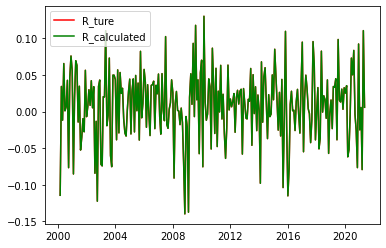

In [366]:
# task 2.1

# calcualte mu, e, r
r = y
a = float(model.beta_ols[0])
b = float(model.beta_ols[1])
mu =  a + b * x_df["Lag1"]
e = model.resid

# for consistency
mu = [[i] for i in mu]
mu = np.matrix(mu)

r_check = mu + e

# print(mu)
# print(e)
# print(r)
# print(r_check)

# calcuate the sample variance
help_r = r - r.mean()
help_mu = mu - mu.mean()
var_r = (help_r.T * help_r) / (len(r) - 1)
var_eps = model.resid.T * model.resid / (len(y)-1-1)
var_mu = (help_mu.T * help_mu) / (len(r) - 1)

print(float(var_r))
print(float(var_eps))
print(float(var_mu))

plt.plot(df.index[ar_order:T],r, color = "r", label = "R_ture")
# plt.plot(df.index[ar_order:T],mu)
# plt.plot(df.index[ar_order:T],e)
plt.plot(df.index[ar_order:T],r_check, color = "g", label = "R_calculated")
plt.legend()
plt.show()



In [ ]:
# task 2.2
resulst_r = []
resulst_t_stat = []

for firm in df.columns:

    # print(f"Calcualtion for Firm: {firm}:")

    # get the desired column
    ap_pa = df[firm]

    # get the length of the pandas Series
    T = len(ap_pa)

    # get the y column: exclude the first x values
    y = ap_pa[ar_order:T]

    # convert to numpy matrix
    y = np.matrix(y)

    # need to transpose the vector
    y = y.reshape(T-ar_order,1)

    # create X : Lag 1
    lag1 = ap_pa[0:T-1]

    # create X : Intercept
    ones = np.ones(T-ar_order)

    # combine to a dataframe
    x_df = pd.DataFrame(ones)
    x_df["Lag1"] = lag1.values

    # convert to a numpy matrix
    X = np.matrix(x_df)

    # run the linear regression model
    model = OLS(X,y)
    model.summaryStats()

    # append the results to a list
    resulst_r.append((firm,model.adjust_r_squared))
    resulst_t_stat.append((firm,model.t_stat[1][0,0]))
    # print(model.adjust_r_squared)
    # print(model.t_stat)
    # print(model.t_stat[1][0,0])

# get the optimal value
t_opt_max = max(resulst_t_stat,key=itemgetter(1))
t_opt_min = min(resulst_t_stat,key=itemgetter(1))
r_opt = max(resulst_r,key=itemgetter(1))

print(t_opt_max)
print(t_opt_min)
print(r_opt)



In [367]:
# task 3

# create a market protfolio with equal weights

# number of firms
count_firms = len(df.columns)

# weights
weightlist = [(1/count_firms) for i in df.columns]
weights = np.array(weightlist)

# portfilio return
portfolioreturn = np.sum(df * weights,axis = 1)
df["portfolioreturn"] = portfolioreturn

# get the desired column
ap_pa = df["portfolioreturn"]

# get the length of the pandas Series
T = len(ap_pa)

# get the y column: exclude the first x values
y = ap_pa[ar_order:T]

# convert to numpy matrix
y = np.matrix(y)

# need to transpose the vector
y = y.reshape(T-ar_order,1)

# create X : Lag 1
lag1 = ap_pa[0:T-1]

# create X : Intercept
ones = np.ones(T-ar_order)

# combine to a dataframe
x_df = pd.DataFrame(ones)
x_df["Lag1"] = lag1.values

# convert to a numpy matrix
X = np.matrix(x_df)

# check for dimension: X shall be a matrix of dim T X K with k being the number of regressors (Lags + Intercept)
# print(X.shape)

# run the linear regression model
model = OLS(X,y)
model.summaryStats()

# calcualte mu, e, r
r = y
a = float(model.beta_ols[0])
b = float(model.beta_ols[1])
mu =  a + b * x_df["Lag1"]
e = model.resid

# for consistency
mu = [[i] for i in mu]
mu = np.matrix(mu)

r_check = mu + e

# print(mu)
# print(e)
print(r)
print(r_check)

# calcuate the sample variance
help_r = r - r.mean()
help_mu = mu - mu.mean()
var_r = (help_r.T * help_r) / (len(r) - 1)
var_eps = model.resid.T * model.resid / (len(y)-1-1)
var_mu = (help_mu.T * help_mu) / (len(r) - 1)

print(float(var_r))
print(float(var_eps))
print(float(var_mu))



----------
Summary Statistics:
    Betas  vol Betas  t-stat
0  0.0046     0.0035  1.3432
1  0.0398     0.0627  0.6345
----------
The residuals volatility is: 0.055
The adjusted R^2 is: -0.0024
----------
0.0030133318157624794
0.0030204365557556464
4.786742509809111e-06
